In [3]:
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
imgflip = cv2.flip(img,1)
cv2.namedWindow('test', cv2.WINDOW_NORMAL)
cv2.resizeWindow('test',1024, 768)
cv2.imshow('test',imgflip)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
font = cv2.FONT_HERSHEY_DUPLEX
imgzi = cv2.putText(img,'Love You',(100,300),font,5.5,(0,0,0),2)
cv2.namedWindow('test', cv2.WINDOW_NORMAL)
cv2.resizeWindow('test',1024, 768)
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#RGB是最常见的情况，然而在OpenCV中，默认的图像的表示确实反过来的，也就是BGR
#至于OpenCV为什么不是人民群众喜闻乐见的RGB，这是历史遗留问题，在OpenCV刚开始研发的年代，
#BGR是相机设备厂商的主流表示方法，虽然后来RGB成了主流和默认，但是这个底层的顺序却保留下来了，
#事实上Windows下的最常见格式之一bmp，底层字节的存储顺序还是BGR。OpenCV的这个特殊之处还是需要注意的，
#比如在Python中，图像都是用numpy的array表示，但是同样的array在OpenCV中的显示效果和matplotlib中的显示效果就会不一样

img = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]],
], dtype=np.uint8)

# 用matplotlib存储
plt.imsave('img_pyplot.jpg', img)

# 用OpenCV存储
cv2.imwrite('img_cv2.jpg', img)

True

In [3]:
#读图像用cv2.imread()，可以按照不同模式读取，一般最常用到的是读取单通道灰度图，或者直接默认读取多通道。
#存图像用cv2.imwrite()，注意存的时候是没有单通道这一说的，根据保存文件名的后缀和当前的array维度，OpenCV自动判断存的通道，
#另外压缩格式还可以指定存储质量，来看代码例子
color_img = cv2.imread('test2.jpg')
print(color_img.shape)

(400, 640, 3)


In [16]:
gray_img = cv2.imread('test2.jpg',cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)
# 把单通道图片保存后，再读取，仍然是3通道，相当于把单通道值复制到3个通道保存
cv2.imwrite('gray_img.jpg',gray_img)
reload_img = cv2.imread('gray_img.jpg')
print(reload_img.shape)
cv2.imwrite('test_imwrite.jpg',color_img,(cv2.IMWRITE_JPEG_QUALITY,50))
cv2.imwrite('test_imwrite2.png',color_img,(cv2.IMWRITE_PNG_COMPRESSION,5))

(400, 640)


In [36]:
img = cv2.imread('test.jpeg')
img_200x200 = cv2.resize(img,(200,200))
img_200x300 = cv2.resize(img,(0,0),fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)
img_300x300 = cv2.copyMakeBorder(img, 50, 50, 0, 0, 
                                       cv2.BORDER_CONSTANT, 
                                       value=(0, 0, 0))
patch_tree = img[750:1300, 1750:2250]  #注意左上角是原点，但是第一个参数调的是y轴

cv2.imwrite('cropped_tree.jpg', patch_tree)
cv2.imwrite('resized_200x200.jpg', img_200x200)
cv2.imwrite('resized_200x300.jpg', img_200x300)
cv2.imwrite('bordered_300x300.jpg', img_300x300)

True

In [37]:
# 通过cv2.cvtColor把图像从BGR转换到HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('turn_green.jpg', turn_green_img)

# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('colorless.jpg', colorless_img)

# 减小明度为原来一半
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('darker.jpg', darker_img)

True

In [40]:
#无论是HSV还是RGB，我们都较难一眼就对像素中值的分布有细致的了解，这时候就需要直方图。
#如果直方图中的成分过于靠近0或者255，可能就出现了暗部细节不足或者亮部细节丢失的情况。
#比如当背景里的暗部细节非常弱的时候，一个常用方法是考虑用Gamma变换来提升暗部细节。
#Gamma变换是矫正相机直接成像和人眼感受图像差别的一种常用手段，
#简单来说就是通过非线性变换让图像从对曝光强度的线性响应变得更接近人眼感受到的响应

img = cv2.imread('psc.jpg')

import numpy as np

# 分通道计算每个通道的直方图
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_corrected = gamma_trans(img, 0.5)
cv2.imwrite('gamma_corrected.jpg', img_corrected)


True

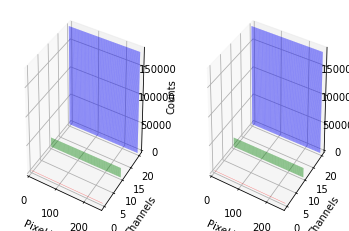

In [76]:
# 分通道计算Gamma矫正后的直方图
hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

# 将直方图进行可视化
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

pix_hists = [
    [hist_b, hist_g, hist_r],
    [hist_b_corrected, hist_g_corrected, hist_r_corrected]
]d

pix_vals = range(256)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist[0], zs=z, zdir='y', color=cs, alpha=0.618, edgecolor='none', lw=0)
    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Channels')
    ax.set_zlabel('Counts')

plt.show()

In [ ]:
import matplotlib.pyplot as plt 
pix_vals = range(256)
ax = fig.add_suplot(111,projection='3d')
plt.figure

In [1]:
import torch

In [2]:
pth_file = 'pose_model.pth'
net = torch.load(pth_file)

NameError: name 'torch' is not defined

In [3]:
#教你如何加水印，哈哈哈
import cv2 
alpha = 0.5
dim = (100,100)
src1 = cv2.imread('1.jpg')
src2 = cv2.imread('2.jpg')
resized1 = cv2.resize(src1, dim, interpolation=cv2.INTER_AREA)
resized2 = cv2.resize(src2, dim, interpolation=cv2.INTER_AREA)
beta = (1.0 - alpha)
dst = cv2.addWeighted(resized1,alpha,resized2,beta,0.0)
cv2.imshow('dst',dst)
cv2.waitKey(0)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
